# Tarea - Ajuste de curvas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [14]:
import numpy as np
# Datos extraidos de la página de quandl
costo = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

In [24]:
import pandas as pd
import scipy.optimize as opt

    
an = pd.DataFrame(columns=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,
                           2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,
                           2034,2035,2036,2037,2038,2039,2040], index = ['Costo'])
an.loc['Costo', :] = [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]
an

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
Costo,10.051101,9.259127,9.444813,9.557723,9.977324,10.298326,10.447217,10.550506,10.590784,10.657418,...,12.122511,12.356448,12.611391,12.814569,13.111372,13.357134,13.559012,13.85861,14.135924,14.436149


In [35]:
ajuste_columns=np.array([14,15,16,17,18,19,20,21,22,23,
                           24,25,26,27,28,29,30,31,32,33,
                           34,35,36,37,38,39,40])

In [31]:
def funcion_de_costo(beta, X, y) :
    r, c = X.shape
    beta = np.reshape(beta, [c, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

import numpy as np

m = len(costo)
ones = np.ones([m, 1])
fecha = np.reshape(ajuste_columns, [m, 1])
X = np.hstack((ones, fecha))
y= np.reshape(costo, [m, 1])

In [32]:
import scipy.optimize as opt
beta = [1,1]
opt.minimize(funcion_de_costo, beta, args=(X,y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518283725
        x: [ 6.502e+00  1.867e-01]
      nit: 5
      jac: [-1.192e-07  2.980e-08]
 hess_inv: [[ 2.410e-01 -8.242e-03]
            [-8.242e-03  3.053e-04]]
     nfev: 21
     njev: 7

In [40]:
ones = np.ones([m, 1])
fecha = np.reshape(ajuste_columns, [m, 1])
fecha2 = np.reshape((ajuste_columns)**2,[m,1])
X = np.hstack((ones, fecha, fecha2))
y= np.reshape(costo, [m, 1])
import scipy.optimize as opt
beta2 = [1,1,1]
opt.minimize(funcion_de_costo, beta2, args=(X,y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.8443848115634303
        x: [ 9.435e+00 -5.031e-02  4.389e-03]
      nit: 8
      jac: [ 0.000e+00 -7.451e-09 -2.235e-08]
 hess_inv: [[ 3.062e+00 -2.362e-01  4.221e-03]
            [-2.362e-01  1.872e-02 -3.410e-04]
            [ 4.221e-03 -3.410e-04  6.315e-06]]
     nfev: 44
     njev: 11

In [39]:
ones = np.ones([m, 1])
fecha = np.reshape(ajuste_columns, [m, 1])
fecha2 = np.reshape((ajuste_columns)**2,[m,1])
fecha3 = np.reshape(ajuste_columns**3, [m,1])
X = np.hstack((ones, fecha, fecha2,fecha3))
y= np.reshape(costo, [m, 1])
import scipy.optimize as opt
beta3 = [1,1,1,1]
opt.minimize(funcion_de_costo, beta3, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.8413227982360588
        x: [ 9.034e+00 -2.731e-03  2.612e-03  2.111e-05]
      nit: 12
      jac: [-1.529e-02  4.493e-03 -5.946e-02 -2.316e+00]
 hess_inv: [[ 4.130e+01 -4.983e+00  1.892e-01 -2.284e-03]
            [-4.983e+00  6.079e-01 -2.331e-02  2.835e-04]
            [ 1.892e-01 -2.331e-02  9.015e-04 -1.105e-05]
            [-2.284e-03  2.835e-04 -1.105e-05  1.364e-07]]
     nfev: 362
     njev: 70

**Grafico**

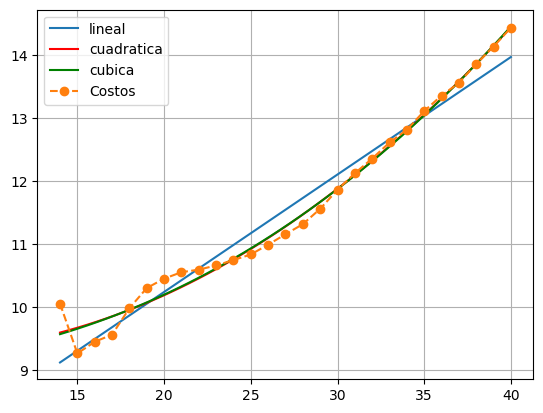

In [69]:
import matplotlib.pyplot as plt

x = np.linspace(14, 40 )
y =  6.502e+00 + 1.867e-01*x
y2 = 9.435e+00 - 5.031e-02*x + 4.389e-03*x**2
y3 = 9.034e+00 - 2.731e-03*x + 2.612e-03*x**2 + 2.111e-05*x**3
y4 = ([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])
x2 = ([14,15,16,17,18,19,20,21,22,23,
       24,25,26,27,28,29,30,31,32,33,
       34,35,36,37,38,39,40])
plt.figure()
plt.plot(x, y, label="lineal")
plt.plot(x, y2, "r-", label="cuadratica")
plt.plot(x, y3, "g-",label="cubica")
plt.plot(x2, y4, "o", label="Costos", linestyle="--")

plt.grid()
plt.legend()
plt.show()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [3]:
import pandas as pd
data = pd.read_csv("population_data.csv") 
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


In [61]:
columna = ["Year","Poblacion"]
modif_data = data[columna]
modif_data

,Year,Poblacion
0,1950,28296
1,1951,29110
2,1952,29980
3,1953,30904
4,1954,31880
...,...,...
61,2011,115683
62,2012,117054
63,2013,118395
64,2014,119713


In [80]:
def scaler(variable) : 
    variable = variable - min(variable) +1
    return variable

modif_data.loc[:, "Year"] = scaler(modif_data["Year"])
modif_data

,Year,Poblacion
0,1,28296
1,2,29110
2,3,29980
3,4,30904
4,5,31880
...,...,...
61,62,115683
62,63,117054
63,64,118395
64,65,119713


In [81]:
def funcion_de_costo(beta, X, y) :
    r, c = X.shape
    beta = np.reshape(beta, [c, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

import numpy as np

m = len(data["Year"])
ones = np.ones([m, 1])
Poblacion = np.reshape(data["Poblacion"], [m, 1])
X = np.hstack((ones, Poblacion))
y= np.reshape(data["Year"], [m, 1])

66

In [82]:
import scipy.optimize as opt
beta = [1,1]
opt.minimize(funcion_de_costo, beta, args=(X,y))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 88.65994692045965
        x: [ 1.935e+03  6.452e-04]
      nit: 7
      jac: [-1.907e-06 -2.861e-06]
 hess_inv: [[ 5.576e-02 -6.484e-07]
            [-6.484e-07  8.724e-12]]
     nfev: 27
     njev: 9

In [83]:

m = len(data["Year"])
ones = np.ones([m, 1])
Poblacion = np.reshape(data["Poblacion"], [m, 1])
Poblacion2 = np.reshape(data["Poblacion"]**2,[m, 1])
X = np.hstack((ones, Poblacion, Poblacion2))


In [84]:
import scipy.optimize as opt
beta2 = [1,1,1]
opt.minimize(funcion_de_costo, beta2, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4026357.195247286
        x: [ 2.360e+03  4.939e-04 -5.078e-08]
      nit: 7
      jac: [ 1.181e+04 -6.859e+06  5.180e+09]
 hess_inv: [[ 1.027e-07 -3.244e-12  4.903e-17]
            [-3.244e-12  2.071e-11 -2.064e-16]
            [ 4.903e-17 -2.064e-16  2.182e-21]]
     nfev: 220
     njev: 52

In [85]:

m = len(data["Year"])
ones = np.ones([m, 1])
Poblacion = np.reshape(data["Poblacion"], [m, 1])
Poblacion2 = np.reshape(data["Poblacion"]**2,[m, 1])
Poblacion3 = np.reshape(data["Poblacion"]**3,[m, 1])
X = np.hstack((ones, Poblacion, Poblacion2, Poblacion3))


In [86]:
import scipy.optimize as opt
beta3 = [1,1,1,1]
opt.minimize(funcion_de_costo, beta3, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 7.0397284318218616e+16
        x: [-3.093e+07  2.537e+03 -2.572e-02  1.790e-08]
      nit: 10
      jac: [-1.074e+09 -7.178e+13 -1.459e+19 -1.341e+24]
 hess_inv: [[ 6.844e-03  1.379e-10 -1.543e-12  1.092e-17]
            [ 1.379e-10  2.567e-17 -5.390e-19  4.914e-24]
            [-1.543e-12 -5.390e-19  5.971e-21 -5.434e-26]
            [ 1.092e-17  4.915e-24 -5.434e-26  5.083e-31]]
     nfev: 342
     njev: 66

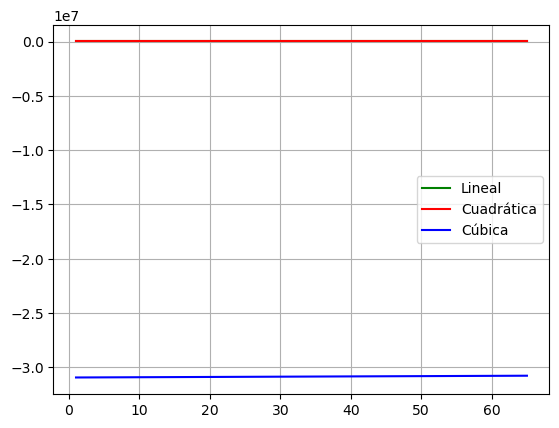

In [71]:
import matplotlib.pyplot as plt
x = np.linspace(1,65)
y =  1.935e+03 + 6.452e-04*x
y2 = 2.360e+03 + 4.939e-04*x -5.078e-08*x**2
y3 = -3.093e+07 + 2.537e+03*x -2.572e-02*x**2 + 1.790e-08*x**3
plt.plot(x,y,"g-", label = "Lineal")
plt.plot(x, y2,"r-", label = "Cuadrática")
plt.plot(x, y3,"b-", label = "Cúbica")
plt.legend()
plt.grid()

**Error cuadrático**

<BarContainer object of 3 artists>

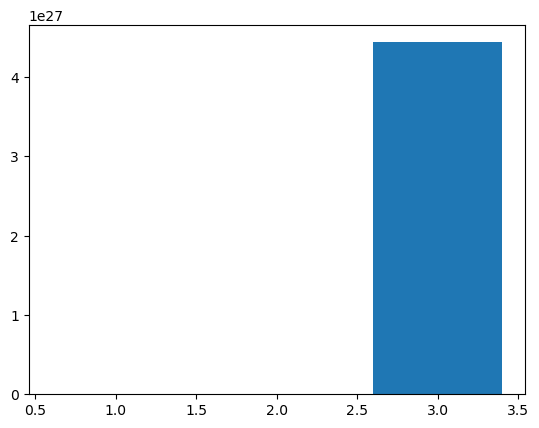

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

no_terminos = [1,2,3]
error = [88.65994692045965,4026357.195247286,4.438392080338875e+27]
plt.figure()
plt.bar(no_terminos, error)

**Conclusiones**  
El error de las curvas al cuadrado y al cubo es demasiado, por lo tanto, la ecuación lineal es la mejor.

**Punto 2**

In [87]:
columna = ["Year","Nacimientos"]
modif_data = data[columna]
modif_data

,Year,Nacimientos
0,1950,1174947
1,1951,1183788
2,1952,1195209
3,1953,1261775
4,1954,1339837
...,...,...
61,2011,2586287
62,2012,2498880
63,2013,2478889
64,2014,2463420


In [88]:
def scaler(variable) : 
    variable = variable - min(variable) +1
    return variable

modif_data.loc[:, "Year"] = scaler(modif_data["Year"])
modif_data

,Year,Nacimientos
0,1,1174947
1,2,1183788
2,3,1195209
3,4,1261775
4,5,1339837
...,...,...
61,62,2586287
62,63,2498880
63,64,2478889
64,65,2463420


In [89]:
def funcion_de_costo(beta, X, y) :
    r, c = X.shape
    beta = np.reshape(beta, [c, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

import numpy as np

m = len(data["Year"])
ones = np.ones([m, 1])
nacimientos = np.reshape(data["Nacimientos"], [m, 1])
X = np.hstack((ones, nacimientos))
y= np.reshape(data["Year"], [m, 1])

In [90]:
import scipy.optimize as opt
beta = [1,1]
opt.minimize(funcion_de_costo, beta, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 6960.122694356323
        x: [ 1.909e+03  3.212e-05]
      nit: 6
      jac: [ 0.000e+00  2.185e-02]
 hess_inv: [[ 1.666e-01 -6.982e-08]
            [-6.982e-08  3.066e-14]]
     nfev: 165
     njev: 51

In [91]:
m = len(data["Year"])
ones = np.ones([m, 1])
nacimientos = np.reshape(data["Nacimientos"], [m, 1])
nacimientos2 = np.reshape(data["Nacimientos"]**2, [m,1])
X = np.hstack((ones, nacimientos, nacimientos2))
beta2 = [1,1,1]
opt.minimize(funcion_de_costo, beta2, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 12773528136071.027
        x: [ 4.858e+06 -4.660e+00  1.007e-06]
      nit: 20
      jac: [-3.788e+07 -1.035e+14 -2.378e+20]
 hess_inv: [[ 1.403e+00 -1.293e-06  2.990e-13]
            [-1.293e-06  1.238e-12 -2.952e-19]
            [ 2.990e-13 -2.952e-19  7.217e-26]]
     nfev: 332
     njev: 80

In [92]:
m = len(data["Year"])
ones = np.ones([m, 1])
nacimientos = np.reshape(data["Nacimientos"], [m, 1])
nacimientos2 = np.reshape(data["Nacimientos"]**2, [m,1])
nacimientos3 = np.reshape(data["Nacimientos"]**3,[m,1])
X = np.hstack((ones, nacimientos, nacimientos2, nacimientos3))
beta3 = [1,1,1,1]
opt.minimize(funcion_de_costo, beta3, args=(X,y))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.106923728771801e+35
        x: [ 1.000e+00  1.000e+00 -2.740e+01 -9.998e-03]
      nit: 2
      jac: [ 0.000e+00  0.000e+00 -1.216e+30 -2.214e+37]
 hess_inv: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
            [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
            [ 0.000e+00  0.000e+00 -8.095e-25 -3.390e-28]
            [ 0.000e+00  0.000e+00 -2.967e-28 -1.242e-31]]
     nfev: 32
     njev: 4

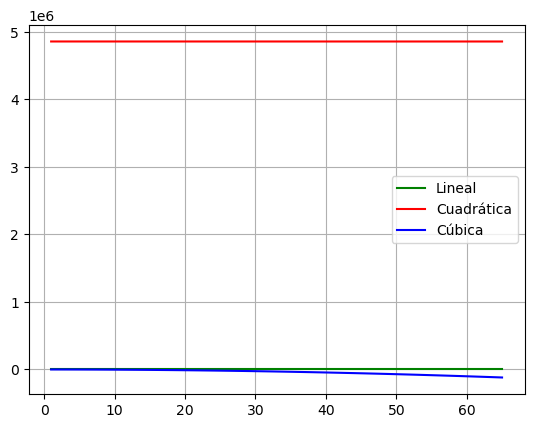

In [94]:
import matplotlib.pyplot as plt
x = np.linspace(1,65)
y =  1.909e+03 +3.212e-05*x
y2 = 4.858e+06 -4.660e+00*x + 1.007e-06*x**2
y3 = 1.000e+00 + 1.000e+00*x  -2.740e+01*x**2 - 9.998e-03*x**3
plt.plot(x,y,"g-", label = "Lineal")
plt.plot(x, y2,"r-", label = "Cuadrática")
plt.plot(x, y3,"b-", label = "Cúbica")
plt.legend()
plt.grid()

<BarContainer object of 3 artists>

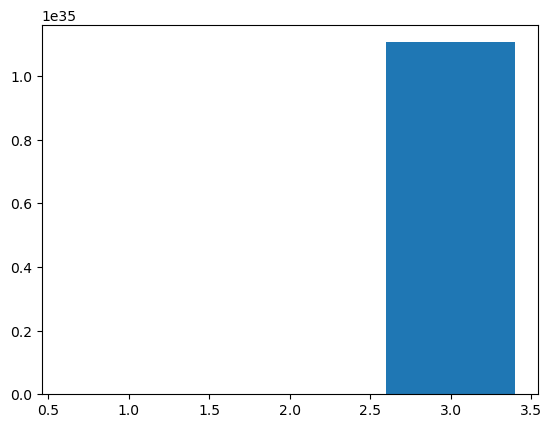

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

no_terminos = [1,2,3]
error = [6960.122694356323,12773528136071.027,1.106923728771801e+35]
plt.figure()
plt.bar(no_terminos, error)

**Conclusión**  
De igual manera la lineal es la que tiene menor error.